# "Survival Prediction on the Titanic: A Comparative Study of Decision Tree, Logistic Regression, and KNN Classification"

### Objective: Comparison of Classification Algorithms on the Titanic Dataset

#### Process flow 

1. Load the Titanic dataset,on which EDA and feature engineering, and scaling has been performed in exploration stage 
2. Perform data preprocessing and feature engineering as required.
3. Split the dataset into training and testing sets using train_test_split() function from sklearn.model_selection.
4. Initialize the decision tree, logistic regression, and KNN classification models.
5. Fit the models on the training data using their respective fit() functions.
6. Predict the labels for both the training and testing data using the predict() function of each model.
7. Calculate and store the accuracy, precision, recall, F1 score, and AUC ROC for each model using appropriate metrics from sklearn.metrics.
8. Plot the AUC curve for each model using the roc_curve() and auc() functions from sklearn.metrics.
9. Create a dataframe to store the performance metrics for each model, including the train accuracy, test accuracy, train precision, test precision, train recall, test recall, train F1 score, test F1 score, train AUC ROC, and test AUC ROC.
10. Print the performance metrics in a tabular format.


This created dataframe stores the performance metrics for each model, allowing for easy comparison and analysis of the classification algorithms on the Titanic dataset.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import warnings
warnings.filterwarnings("ignore")



In [60]:
df=pd.read_csv('Titanic_Cleaned.csv')
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
1,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
2,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
3,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
4,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0


In [61]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'family_type_Large',
       'family_type_Medium'],
      dtype='object')

In [62]:
# drop unneccesary columns 
df=df.drop(['PassengerId','Name','Ticket'],1)


In [63]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'family_type_Large', 'family_type_Medium'],
      dtype='object')

In [64]:
df.shape

(1132, 10)

In [65]:
#check for null values 
df.isna().sum()

Survived              0
Age                   0
Fare                  0
Pclass_2              0
Pclass_3              0
Sex_male              0
Embarked_Q            0
Embarked_S            0
family_type_Large     0
family_type_Medium    0
dtype: int64

In [165]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the 'Age' and 'Fare' columns
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [166]:
#features as X
X= df.drop('Survived', axis=1)
#labels as y
y=df.Survived
X.head(2)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0.333333,0.111538,0,1,1,0,1,0,1
1,0.393939,0.121923,0,1,0,0,1,0,0


In [167]:
from sklearn.model_selection import train_test_split

# split data into train and test in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The above code will split the data into 80% training and 20% testing datasets.
# The 'random_state' parameter ensures that the random splitting is reproducible.


In [168]:
X_train.shape

(905, 9)

In [169]:
X_test.shape

(227, 9)

# Decision Tree 

In [170]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [171]:
#evaluate train and test performances 
dt_train_pred = dt_model.predict(X_train)
dt_train_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [172]:
#for test set 
dt_test_pred=dt_model.predict(X_test)
dt_test_pred


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import statsmodels.api as sm
# check accuracy for train and test 
dt_test_accuracy=accuracy_score(y_test, dt_test_pred)
dt_train_accuracy=accuracy_score(y_train, dt_train_pred)
dt_test_accuracy,dt_train_accuracy


(0.8458149779735683, 0.8784530386740331)

In [174]:
#check precision for train and test 
dt_train_precision=precision_score(y_train, dt_train_pred)
dt_test_precision=precision_score(y_test, dt_test_pred)
dt_train_precision,dt_test_precision

(0.8430034129692833, 0.7671232876712328)

In [175]:
#check recall score  for train and test 
dt_train_recall=recall_score(y_train, dt_train_pred)
dt_test_recall=recall_score(y_test, dt_test_pred)
dt_train_recall,dt_test_recall

(0.7942122186495176, 0.7567567567567568)

In [176]:
from sklearn.metrics import f1_score
dt_train_f1=f1_score(y_train, dt_train_pred)
dt_test_f1=f1_score(y_test, dt_test_pred)
dt_train_f1,dt_test_f1


(0.8178807947019867, 0.761904761904762)

In [177]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve,roc_auc_score

In [178]:
# Calculate area under roc curve for train and test
dt_train_auc = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1])
dt_test_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
dt_train_auc,dt_test_auc

(0.9226698929271276, 0.8803214979685569)

# Logistic Regression


In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [181]:
#evaluate model performnance on train and test 
lr_train_pred = lr_model.predict(X_train)
lr_train_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [182]:
lr_test_pred=lr_model.predict(X_test)
lr_test_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [183]:
# check accuracy for train and test 
lr_train_accuracy=accuracy_score(y_train, lr_train_pred)
lr_test_accuracy=accuracy_score(y_test, lr_test_pred)
lr_train_accuracy,lr_test_accuracy


(0.8530386740331491, 0.8370044052863436)

In [184]:
# check precision score for train and test 
lr_train_precision=precision_score(y_train, lr_train_pred)
lr_test_precision=precision_score(y_test, lr_test_pred)
lr_train_precision,lr_test_precision


(0.8047945205479452, 0.7761194029850746)

In [185]:
# check f1 score for train and test 
lr_train_f1=f1_score(y_train, lr_train_pred)
lr_test_f1=f1_score(y_test, lr_test_pred)
lr_train_f1,lr_test_f1


(0.7794361525704809, 0.7375886524822697)

In [186]:
# check recall score for train and test 
lr_train_recall=recall_score(y_train, lr_train_pred)
lr_test_recall=recall_score(y_test, lr_test_pred)
lr_train_recall,lr_test_recall


(0.7556270096463023, 0.7027027027027027)

In [187]:
# Calculate area under roc curve for train and test
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
lr_train_auc,lr_test_auc

(0.8881905875475008, 0.870296767355591)

# KNN CLASIFICATION 


In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
# Build KNN classification model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [190]:
# Evaluate model performnace on Train and test data 


In [191]:
knn_train_pred = knn_model.predict(X_train)
knn_train_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [192]:
knn_test_pred = knn_model.predict(X_test)
knn_test_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [193]:
# check accuracy for train and test 
knn_train_accuracy=accuracy_score(y_train, knn_train_pred)
knn_test_accuracy=accuracy_score(y_test, knn_test_pred)
knn_train_accuracy,knn_test_accuracy


(0.8928176795580111, 0.8237885462555066)

In [194]:
# check precision score for train and test 
knn_train_precision=precision_score(y_train, knn_train_pred)
knn_test_precision=precision_score(y_test, knn_test_pred)
knn_train_precision,knn_test_precision


(0.8590604026845637, 0.75)

In [195]:
# check f1 score for train and test 
knn_train_f1=f1_score(y_train, knn_train_pred)
knn_test_f1=f1_score(y_test, knn_test_pred)
knn_train_f1,knn_test_f1


(0.8407224958949098, 0.7183098591549296)

In [196]:
# check recall score for train and test 
knn_train_recall=recall_score(y_train, knn_train_pred)
knn_test_recall=recall_score(y_test, knn_test_pred)
knn_train_recall,knn_test_recall


(0.8231511254019293, 0.6891891891891891)

In [197]:
# Calculate area under roc curve for train and test
knn_train_auc = roc_auc_score(y_train, knn_model.predict_proba(X_train)[:,1])
knn_test_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
knn_train_auc,knn_test_auc

(0.9566349453809262, 0.8201289524818937)

# Plot Auc-roc curve for each of the classification models 

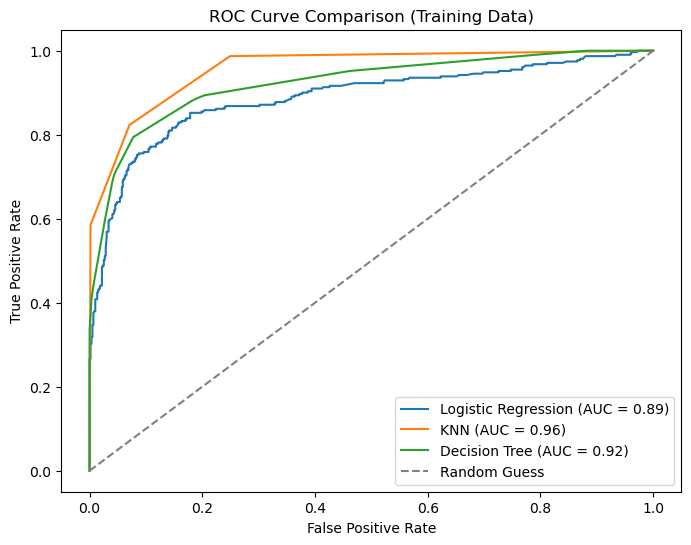

In [198]:
#ROC CURVE COMPARISON FOR TRAIN DATA 
plt.figure(figsize=(8,6))

# Logistic Regression
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, lr_model.predict_proba(X_train)[:,1])
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
plt.plot(lr_train_fpr, lr_train_tpr, label=f'Logistic Regression (AUC = {lr_train_auc:.2f})')

# KNN
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, knn_model.predict_proba(X_train)[:,1])
knn_train_auc = roc_auc_score(y_train, knn_model.predict_proba(X_train)[:,1])
plt.plot(knn_train_fpr, knn_train_tpr, label=f'KNN (AUC = {knn_train_auc:.2f})')

# Decision Tree
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, dt_model.predict_proba(X_train)[:,1])
dt_train_auc = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1])
plt.plot(dt_train_fpr, dt_train_tpr, label=f'Decision Tree (AUC = {dt_train_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training Data)')
plt.legend()
plt.show()


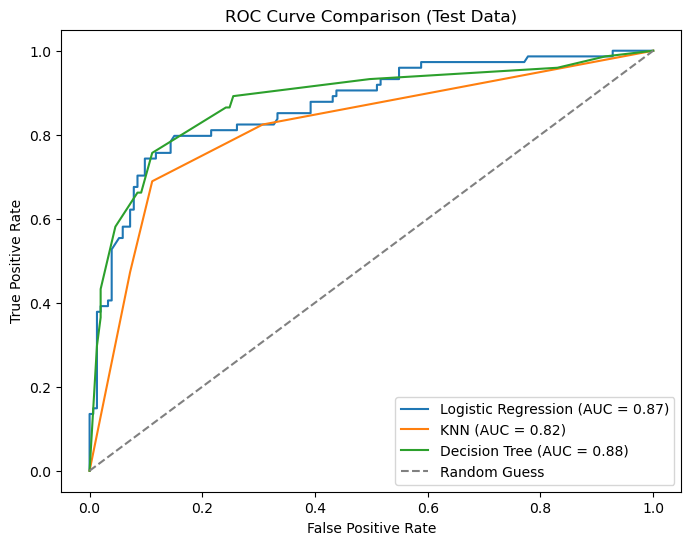

In [199]:
#ROC CURVE COMPARISON FOR TEST DATA
plt.figure(figsize=(8,6))

# Logistic Regression
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(lr_test_fpr, lr_test_tpr, label=f'Logistic Regression (AUC = {lr_test_auc:.2f})')

# KNN
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
knn_test_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
plt.plot(knn_test_fpr, knn_test_tpr, label=f'KNN (AUC = {knn_test_auc:.2f})')

# Decision Tree
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
dt_test_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
plt.plot(dt_test_fpr, dt_test_tpr, label=f'Decision Tree (AUC = {dt_test_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Test Data)')
plt.legend()
plt.show()


In [200]:
# saving  performance metrics for each model in a dataframe 
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'],
    'Train Accuracy': [lr_train_accuracy,knn_train_accuracy,dt_train_accuracy],
    'Test Accuracy': [lr_test_accuracy,knn_test_accuracy,dt_test_accuracy],
    'Train Precision': [lr_train_precision,knn_train_precision,dt_train_precision],
    'Test Precision': [lr_test_precision,knn_test_precision,dt_test_precision],
    'Train Recall': [lr_train_recall,knn_train_recall,dt_train_recall],
    'Test Recall': [lr_test_recall,knn_test_recall,dt_test_recall],
    'Train F1 Score': [lr_train_f1,knn_train_f1,dt_train_f1],
    'Test F1 Score': [lr_test_f1,knn_test_f1,dt_test_f1],
    'Train AUC ROC': [lr_train_auc,knn_train_auc,dt_train_auc],
    'Test AUC ROC': [lr_test_auc,knn_test_auc,dt_test_auc]
                        })




In [202]:
# Displaying Performance metrics of all the 3 models 
summary_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train AUC ROC,Test AUC ROC
0,Logistic Regression,0.853039,0.837004,0.804795,0.776119,0.755627,0.702703,0.779436,0.737589,0.888191,0.870297
1,K-Nearest Neighbors,0.892818,0.823789,0.859060,0.750000,0.823151,0.689189,0.840722,0.718310,0.956635,0.820129
2,Decision Tree,0.878453,0.845815,0.843003,0.767123,0.794212,0.756757,0.817881,0.761905,0.922670,0.880321


The table provides the performance metrics for three different algorithms (Logistic Regression, K-Nearest Neighbors, and Decision Tree) on the Titanic dataset. Let's analyze the metrics and compare the train and test performance for each parameter:

1. Accuracy: Represents the overall correctness of the model's predictions.

2. Precision: Measures the proportion of true positive predictions out of all positive predictions.

3. Recall: Calculates the proportion of true positive predictions out of all actual positive instances.

4. F1 Score: Combines precision and recall into a single metric, which considers both false positives and false negatives.

5. AUC ROC: Represents the Area Under the Receiver Operating Characteristic curve, which indicates the model's ability to distinguish between positive and negative instances.

Now, let's analyze the train and test performance for each algorithm:

1. Logistic Regression:
   - The model shows reasonably good performance on both the train and test sets, with similar accuracy, precision, recall, F1 score, and AUC ROC values.
   - It seems to generalize well to unseen data, as the test performance is close to the train performance.

2. K-Nearest Neighbors:
   - The model has slightly higher accuracy, precision, recall, F1 score, and AUC ROC on the train set compared to the test set.
   - It exhibits some overfitting, as the performance drops on the test set compared to the train set.
   - The model's performance on precision is lower on the test set, indicating a higher rate of false positive predictions.

3. Decision Tree:
   - The model performs consistently well on both the train and test sets, with similar accuracy, precision, recall, F1 score, and AUC ROC values.
   - It shows good generalization capability, as the test performance is comparable to the train performance.
   - The decision tree algorithm might have captured the underlying patterns in the Titanic dataset effectively.

Overall, the Decision Tree algorithm seems to be performing the best on the Titanic dataset. It exhibits good accuracy, precision, recall, F1 score, and AUC ROC on both the train and test sets. It demonstrates a balanced trade-off between overfitting and generalization capability.

The K-Nearest Neighbors algorithm shows some overfitting, leading to lower performance on the test set. It might benefit from further tuning or feature selection to improve its performance.

The Logistic Regression algorithm performs well, showing good generalization to unseen data. However, it slightly underperforms compared to the Decision Tree algorithm. Possible reasons could include the complexity of the underlying relationships in the data, which the decision tree model captures more effectively.

In summary, based on the provided metrics, the Decision Tree algorithm appears to be the best performer, while the K-Nearest Neighbors algorithm shows some signs of overfitting. The Logistic Regression algorithm performs reasonably well but falls slightly behind the Decision Tree algorithm in terms of overall performance.